In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv("customer_churn-1.csv")

In [ ]:
data.head()

In [ ]:
data.columns

In [111]:
data.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [113]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [114]:
data.loc[data['gender'] == 'Male'] 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [115]:
new_customer = data.loc[(data['gender'] == 'Female') & (data['SeniorCitizen'] == 1) & (data['PaymentMethod'] == 'Mailed check')]

In [116]:
new_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No
694,2682-KEVRP,Female,1,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.05,417,No
747,3966-HRMZA,Female,1,No,No,3,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,75.05,202.9,No
947,9904-EHEVJ,Female,1,Yes,Yes,32,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,91.35,2896.55,No
1029,4184-TJFAN,Female,1,Yes,Yes,3,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,88.30,273.75,Yes
1112,2176-LVPNX,Female,1,No,No,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,89.85,6293.45,No


In [117]:
new_customer1 = data.loc[(data['tenure'] < 10) | (data['TotalCharges'] < '500.00' )]
new_customer1


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [118]:
value = data['Churn'].value_counts(sort = True)
tags = np.unique(data.Churn)

([<matplotlib.patches.Wedge at 0x2457f7893f0>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')])

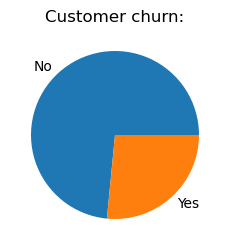

In [119]:
# Visualize the data
plt.figure(figsize = (6,6))
plt.subplot(212)
plt.title("Customer churn:")
plt.pie(value, labels = tags)

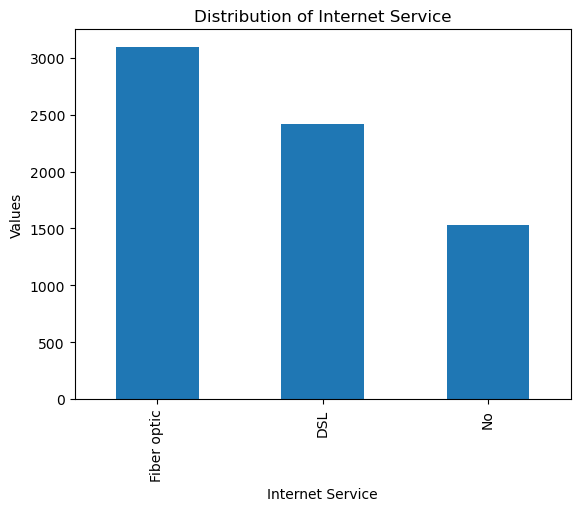

In [120]:
data['InternetService'].value_counts().head().plot.bar()
#plt.bar(df['InternetService'].value_counts().head())  #Need to investigate more.
plt.title('Distribution of Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Values')
plt.show()

In [121]:
# Encode the categorical target variable
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [122]:
x = data.loc[:,['tenure']].values
y = data['Churn']

In [123]:
x

array([[ 1],
       [34],
       [ 2],
       ...,
       [11],
       [ 4],
       [66]], dtype=int64)

In [124]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 10)

In [126]:
# Feature Scaling to prevent overfitting.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [127]:
model = Sequential()

model.add(Dense(units = 8, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(units = 1, activation = 'sigmoid'))


In [128]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [129]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 16        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [130]:
model.fit(X_train, y_train, batch_size = 32, epochs = 150)

Epoch 1/150
177/177 [==============================] - 1s 3ms/step - loss: 0.7142 - accuracy: 0.5509
Epoch 2/150
177/177 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.7291
Epoch 3/150
177/177 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.7291
Epoch 4/150
177/177 [==============================] - 0s 3ms/step - loss: 0.5268 - accuracy: 0.7291
Epoch 5/150
177/177 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.7291
Epoch 6/150
177/177 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.7291
Epoch 7/150
177/177 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.7291
Epoch 8/150
177/177 [==============================] - 0s 3ms/step - loss: 0.5208 - accuracy: 0.7291
Epoch 9/150
177/177 [==============================] - 0s 3ms/step - loss: 0.5201 - accuracy: 0.7291
Epoch 10/150
177/177 [==============================] - 0s 3ms/step - loss: 0.5193 - accura

In [131]:
#Prediction on test set
y_pred = model.predict(X_test)

45/45 [==============================] - 0s 3ms/step


In [132]:
#Evaluate model performace
y_pred = [1 if x > 0.5 else 0 for x in y_pred]
confusion = confusion_matrix(y_test, y_pred)

In [133]:
confusion

array([[949, 117],
       [210, 133]], dtype=int64)

In [134]:
accuracy = accuracy_score(y_test, y_pred)

In [135]:
accuracy

0.7679205110007097

In [136]:
model = Sequential()

model.add(Dropout(0.3 , input_dim = X_train.shape[1]))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [137]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [138]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 1)                 0         
                                                                 
 dense_8 (Dense)             (None, 8)                 16        
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [139]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
177/177 [==============================] - 1s 2ms/step - loss: 0.6018 - accuracy: 0.6883
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.7345
Epoch 3/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5542 - accuracy: 0.7407
Epoch 4/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5493 - accuracy: 0.7336
Epoch 5/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5483 - accuracy: 0.7293
Epoch 6/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.7345
Epoch 7/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5441 - accuracy: 0.7339
Epoch 8/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5469 - accuracy: 0.7343
Epoch 9/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5428 - accuracy: 0.7352
Epoch 10/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5457 - accura

In [171]:
y_pred1 = model.predict(X_test)

ValueError: in user code:

    File "C:\Users\Iyk\anaconda3\New folder1\lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Iyk\anaconda3\New folder1\lib\site-packages\keras\src\engine\training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Iyk\anaconda3\New folder1\lib\site-packages\keras\src\engine\training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Iyk\anaconda3\New folder1\lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step
        return self(x, training=False)
    File "C:\Users\Iyk\anaconda3\New folder1\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Iyk\anaconda3\New folder1\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_6' (type Sequential).
    
    Input 0 of layer "dense_10" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_6' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
      • training=False
      • mask=None


In [172]:
y_pred1 = [1 if x > 0.5 else 0 for x in y_pred1]
y_pred1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [173]:
confus = confusion_matrix(y_test, y_pred1)

In [174]:
confus

array([[1066,    0],
       [ 343,    0]], dtype=int64)

In [175]:
accuracy1 = accuracy_score(y_test, y_pred1)

In [176]:
accuracy1

0.7565649396735273

In [211]:
np.where(pd.isnull(data))

(array([], dtype=int64), array([], dtype=int64))

In [212]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [213]:
pd.isna(data['TotalCharges'])

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7032, dtype: bool

In [214]:
data[data['TotalCharges'] == ''].index

Int64Index([], dtype='int64')

In [215]:
data[(data['TotalCharges'].notnull()) & (data['TotalCharges']!=u'') ].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7033, 7034, 7035, 7036, 7037, 7038, 7039, 7040, 7041, 7042],
           dtype='int64', length=7032)

In [216]:
data = data.replace('^\s*$',np.nan, regex = True)

In [217]:
data = data.replace({'':0,' ':0,'^\s*$':0, float('NaN'):0})

In [218]:
data = data[data.TotalCharges != 0]

In [219]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [220]:
data.shape

(7032, 21)

In [221]:
data['Churn'].value_counts()

0.0    7032
Name: Churn, dtype: int64

In [222]:
data['Churn'] = data['Churn'].apply(lambda x: 1.00 if x == 'Yes' else 0.00)

In [223]:
data['tenure'] = data['tenure'].astype(float)

In [224]:
x_2 = data.loc[:,['tenure', 'MonthlyCharges', 'TotalCharges']].values
y_2 = data['Churn']

In [225]:
x_2

array([[1.0000e+00, 2.9850e+01, 2.9850e+01],
       [3.4000e+01, 5.6950e+01, 1.8895e+03],
       [2.0000e+00, 5.3850e+01, 1.0815e+02],
       ...,
       [1.1000e+01, 2.9600e+01, 3.4645e+02],
       [4.0000e+00, 7.4400e+01, 3.0660e+02],
       [6.6000e+01, 1.0565e+02, 6.8445e+03]])

In [226]:
y_2

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    0.0
7042    0.0
Name: Churn, Length: 7032, dtype: float64

In [227]:
x_2.shape

(7032, 3)

In [228]:
y_2.shape

(7032,)

In [229]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2,y_2, test_size = 0.25, random_state = 10, shuffle = True)

In [230]:
print("X Train shape" , X_2_train.shape)
print("X Test shape" , X_2_test.shape)
print("y Train shape" , y_2_train.shape)
print("y Test shape" , y_2_test.shape)

X Train shape (5274, 3)
X Test shape (1758, 3)
y Train shape (5274,)
y Test shape (1758,)


In [231]:
sc = StandardScaler()
X_2_train = sc.fit_transform(X_2_train)
X_2_test = sc.fit_transform(X_2_test)

In [232]:
model = Sequential()

model.add(Dense(units = 6, activation = 'relu', input_dim = X_2_train.shape[1]))
model.add(Dense(units = 1, activation = 'sigmoid'))



In [233]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [234]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 6)                 24        
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [235]:
model.fit(X_2, y_2, batch_size = 20, epochs = 200)

Epoch 1/200
352/352 [==============================] - 3s 3ms/step - loss: 30.6388 - accuracy: 0.7200
Epoch 2/200
352/352 [==============================] - 1s 3ms/step - loss: 0.4932 - accuracy: 1.0000
Epoch 3/200
352/352 [==============================] - 1s 3ms/step - loss: 0.3804 - accuracy: 1.0000
Epoch 4/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1541 - accuracy: 1.0000
Epoch 5/200
352/352 [==============================] - 1s 3ms/step - loss: 8.7798e-04 - accuracy: 1.0000
Epoch 6/200
352/352 [==============================] - 1s 3ms/step - loss: 6.4771e-04 - accuracy: 1.0000
Epoch 7/200
352/352 [==============================] - 1s 3ms/step - loss: 4.9094e-04 - accuracy: 1.0000
Epoch 8/200
352/352 [==============================] - 1s 3ms/step - loss: 3.7946e-04 - accuracy: 1.0000
Epoch 9/200
352/352 [==============================] - 1s 3ms/step - loss: 2.9753e-04 - accuracy: 1.0000
Epoch 10/200
352/352 [==============================] - 1s 3ms/step - 

In [236]:
y_pred_2 = model.predict(X_2_test)

55/55 [==============================] - 0s 3ms/step


In [237]:
y_pred_2 = [1.00 if x > 0.5 else 0.00 for x in y_pred_2]

In [238]:
y_pred_2

[1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0

In [239]:
confusion_matrix2 = confusion_matrix(y_2_test, y_pred_2)

In [240]:
confusion_matrix2

array([[1437,  321],
       [   0,    0]], dtype=int64)

In [241]:
accuracy_2 = accuracy_score(y_2_test, y_pred_2)

In [242]:
accuracy_2

0.8174061433447098